PRAKTIKUM PENGOLAHAN CITRA MODUL KE-5

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/PRAK PENGOLAHAN CITRA/

/content/drive/MyDrive/PRAK PENGOLAHAN CITRA


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt, floor, ceil
from PIL import Image
import math
from scipy import ndimage

Text(0.5, 1.0, 'grayscale histrogram')

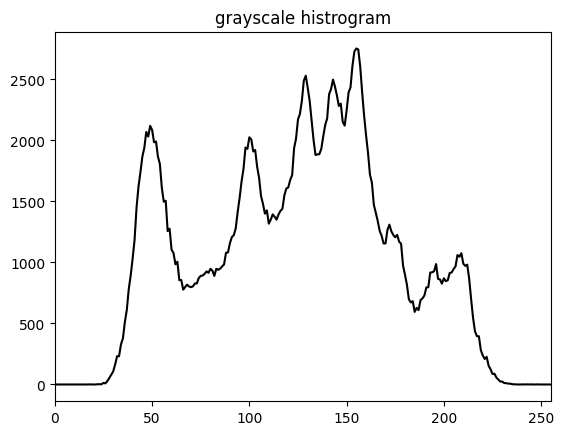

In [ ]:
gray_image = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE)
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0,256])
plt.plot(gray_hist, color='k')
plt.xlim([0, 255])
plt.title('grayscale histrogram')

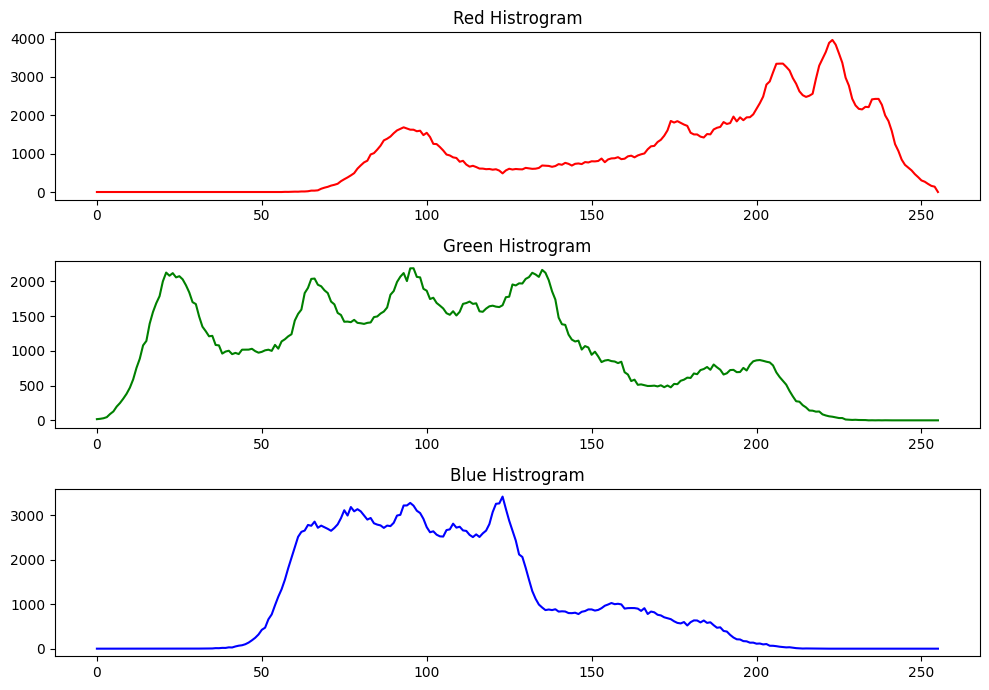

In [ ]:
image = cv2.imread('Lenna.jpg')
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
red_hist = cv2.calcHist([RGB_image], [0], None, [256], [0,255])
green_hist = cv2.calcHist([RGB_image], [1], None, [256], [0,255])
blue_hist = cv2.calcHist([RGB_image], [2], None, [256], [0,255])

baris = 3
kolom = 1
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.plot (red_hist, color='r')
plt.title('Red Histrogram')


fig.add_subplot(baris, kolom, 2)
plt.plot (green_hist, color='g')
plt.title('Green Histrogram')


fig.add_subplot(baris, kolom, 3)
plt.plot (blue_hist, color='b')
plt.title('Blue Histrogram')

plt.tight_layout()
plt.show()

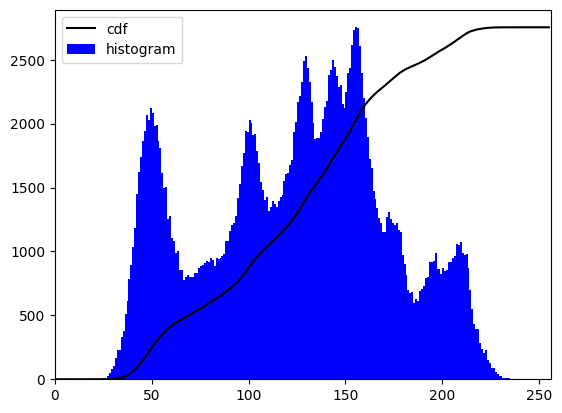

In [ ]:
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'k')
plt.hist(gray_image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Text(0.5, 1.0, 'After Histogram\xa0Equalization')

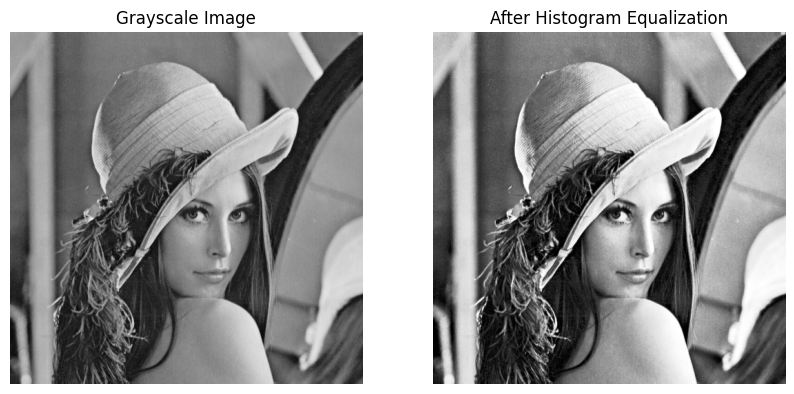

In [ ]:
equ = cv2.equalizeHist(gray_image)

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Grayscale Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(equ, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('After Histogram Equalization')

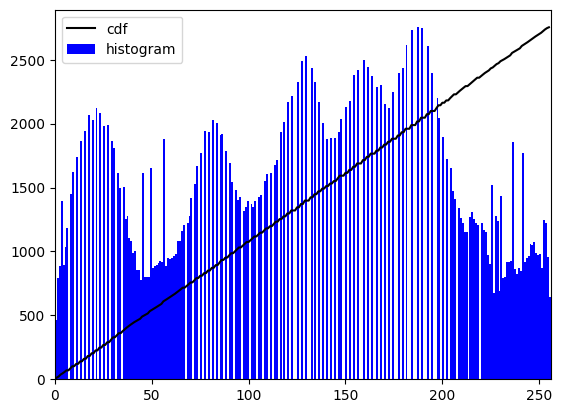

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color='k')
plt.hist(equ.flatten(),256,[0,256], color='b')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

Text(0.5, 1.0, 'Robert Edge\xa0Detection')

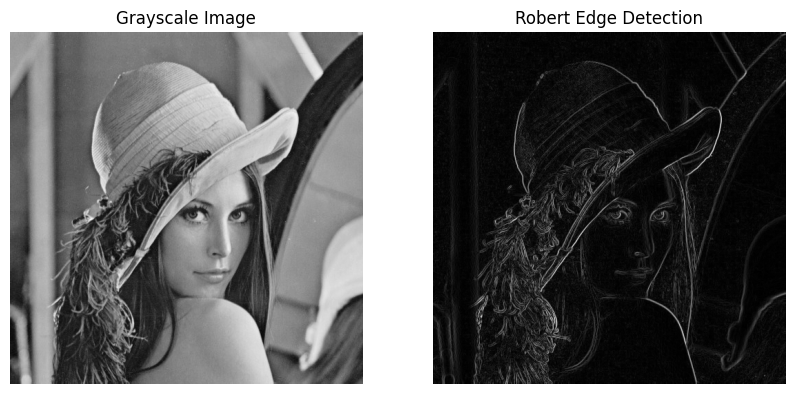

In [ ]:
roberts_operator_x = np.array( [[1,0],
                               [0,-1]])
roberts_operator_y = np.array( [[0,1],
                               [-1,0]])

robert_image = cv2.imread("Lenna.jpg",0).astype('float64')
robert_image/=255.0
vertical = ndimage.convolve(robert_image, roberts_operator_x)
horizontal = ndimage.convolve(robert_image, roberts_operator_y)

robert_edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
robert_edged_img*=255

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Grayscale Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(robert_edged_img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Robert Edge Detection')

Text(0.5, 1.0, 'Prewitt Edge\xa0Detection')

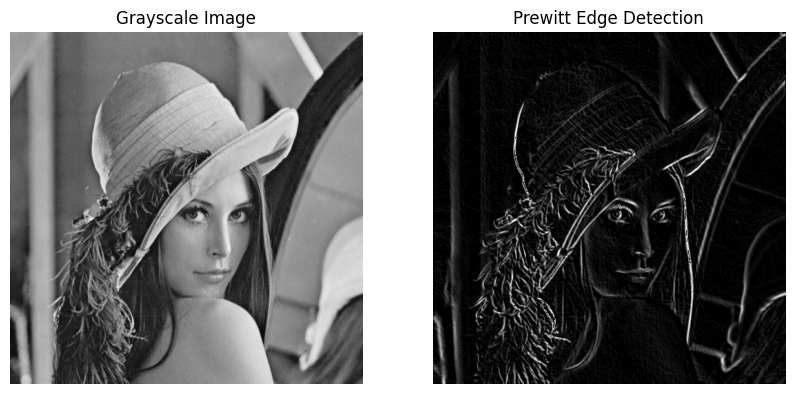

In [ ]:
img_gaussian = cv2.GaussianBlur(gray_image,(3,3),0)
pre_kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
pre_kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, pre_kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, pre_kernely)
pre_out = img_prewittx + img_prewitty

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Grayscale Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(pre_out, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Prewitt Edge Detection')

Text(0.5, 1.0, 'Sobel Edge\xa0Detection')

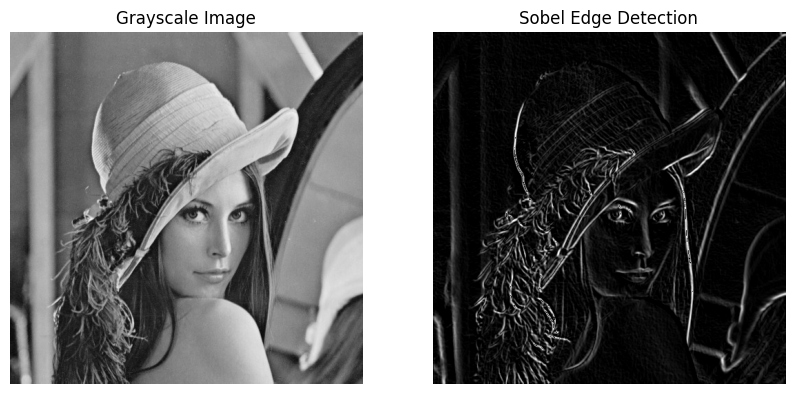

In [ ]:
sobel_kernelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_kernely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_sobelx = cv2.filter2D(img_gaussian, -1, sobel_kernelx)
img_sobely = cv2.filter2D(img_gaussian, -1, sobel_kernely)
img_sobel = img_sobelx + img_sobely

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Grayscale Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(pre_out, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Sobel Edge Detection')

Text(0.5, 1.0, 'Canny Edge\xa0Detection')

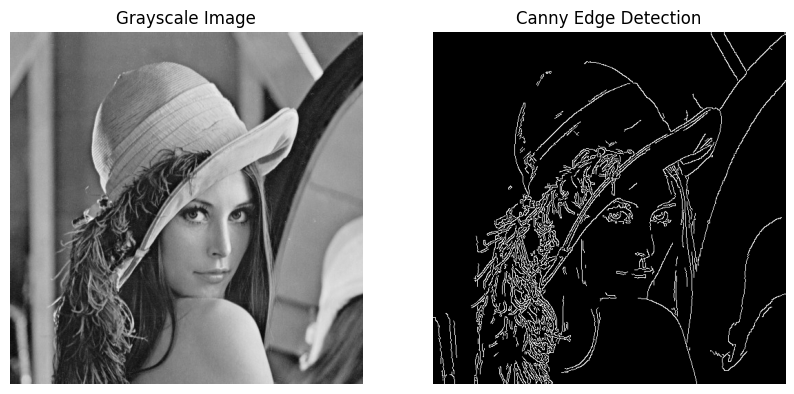

In [ ]:
img_canny = cv2.Canny(gray_image,100,200)

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Grayscale Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(img_canny, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Canny Edge Detection')

Text(0.5, 1.0, 'Canny Edge\xa0Detection')

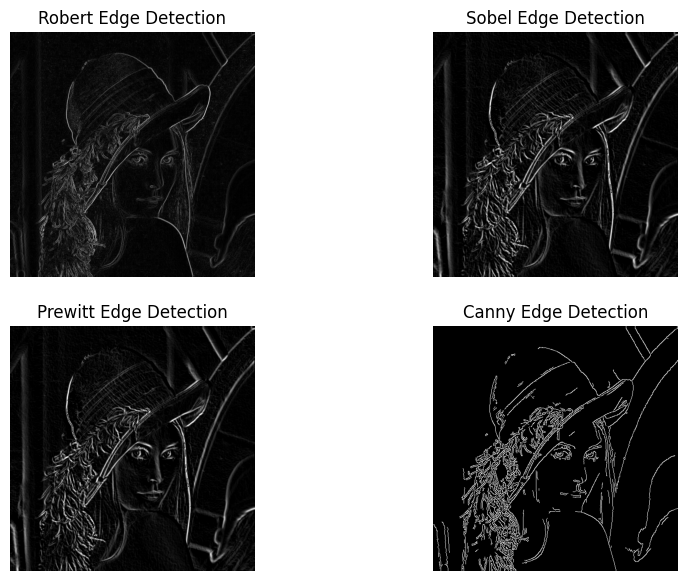

In [ ]:
baris = 2
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(robert_edged_img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Robert Edge Detection')

fig.add_subplot(baris, kolom, 2)
plt.imshow(pre_out, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Sobel Edge Detection')

fig.add_subplot(baris, kolom, 3)
plt.imshow(pre_out, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Prewitt Edge Detection')

fig.add_subplot(baris, kolom, 4)
plt.imshow(img_canny, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Canny Edge Detection')